In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.preprocessing import preprocess_documents
from src.indexing import InvertedIndex
from src.ranking import CosineScore, OkapiBM25, LanguageModel
from src.utils import read_documents, read_queries
from src.evaluation import eval_11_point_interpolation

In [2]:
documents, collection_size = read_documents(path='../dataset/raw/cran.all.1400')
query_list, relevant_list = read_queries(X_path='../dataset/raw/cran.qry', y_path='../dataset/raw/cranqrel', n=225)

In [3]:
preprocessed_documents = preprocess_documents(documents)

In [4]:
inverted_index = InvertedIndex(documents=preprocessed_documents,
                               collection_size=collection_size)
inverted_index.create_posting_list()
inverted_index.create_tf_idf_matrix()

In [5]:
cosine_score = CosineScore(inverted_index)
sample_query = query_list[0]
sample_results = cosine_score.compute_rankings(sample_query, k_top=10)
print(sample_results)

[[3.1704128638029205, 13], [1.8610974840371977, 51], [1.7500106198286047, 12], [1.7325353338913532, 486], [1.5222238044197798, 327], [1.5208677472796073, 184], [1.4883889897680416, 1268], [1.4033613081572813, 746], [1.3611647358955774, 878], [1.3589529562018356, 665]]


In [6]:
okapi_bm25 = OkapiBM25(inverted_index)
sample_query = query_list[0]
sample_results = okapi_bm25.compute_rankings(sample_query, k_top=10, k1=1.5, k3=1.5, b=0.75)
print(sample_results)

[[20.16458997696229, 13], [18.85896068783883, 486], [16.51348888494499, 12], [15.717854771513316, 878], [13.579448174921472, 184], [13.038856597419148, 51], [11.712542750932519, 746], [11.582876935103485, 1144], [11.363183467471224, 1268], [11.261634835177928, 172]]


In [7]:
language_model = LanguageModel(inverted_index)
sample_query = query_list[0]
sample_results = language_model.compute_rankings(sample_query, k_top=10, lambd=0.9)
print(sample_results)

[[5.676311450323362e-40, 486], [6.934139541772458e-41, 12], [6.398886193588745e-41, 878], [3.362197847011656e-41, 13], [1.5625306992333747e-42, 172], [7.033145140408026e-43, 51], [4.510486191432656e-43, 184], [2.705794782692603e-43, 914], [2.3695686389123763e-43, 746], [2.2333850897114603e-43, 141]]


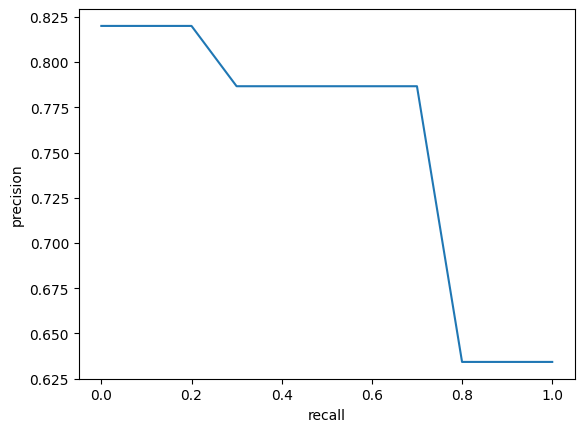

In [8]:
interpolated_precision_list = []
sample_queries = query_list[0:5]
sample_relevants = relevant_list[0:5]
for i,query in enumerate(sample_queries):
    # curr_results = mapping_model_func[model_name](query=query, k_top=k_top, **model_param)
    sample_results = cosine_score.compute_rankings(query, k_top=10)
    curr_interpolated_precision = eval_11_point_interpolation(y_orig=sample_relevants[i], predicted=[doc[1] for doc in sample_results])
    interpolated_precision_list.append(curr_interpolated_precision)
recall = [i*0.1 for i in range(11)]
mean_average_precision = np.array(interpolated_precision_list).sum(axis=0)/len(sample_queries)

plt.plot(recall, mean_average_precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

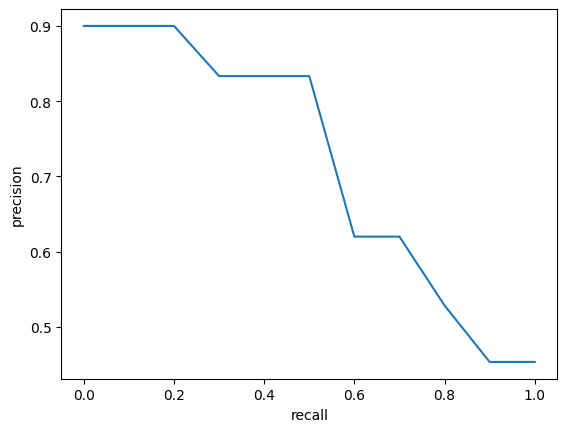

In [9]:
interpolated_precision_list = []
sample_queries = query_list[0:5]
sample_relevants = relevant_list[0:5]
for i,query in enumerate(sample_queries):
    # curr_results = mapping_model_func[model_name](query=query, k_top=k_top, **model_param)
    sample_results = okapi_bm25.compute_rankings(query, k_top=10, k1=1.5, k3=1.5, b=0.75, method='long')
    curr_interpolated_precision = eval_11_point_interpolation(y_orig=sample_relevants[i], predicted=[doc[1] for doc in sample_results])
    interpolated_precision_list.append(curr_interpolated_precision)
recall = [i*0.1 for i in range(11)]
mean_average_precision = np.array(interpolated_precision_list).sum(axis=0)/len(sample_queries)

plt.plot(recall, mean_average_precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

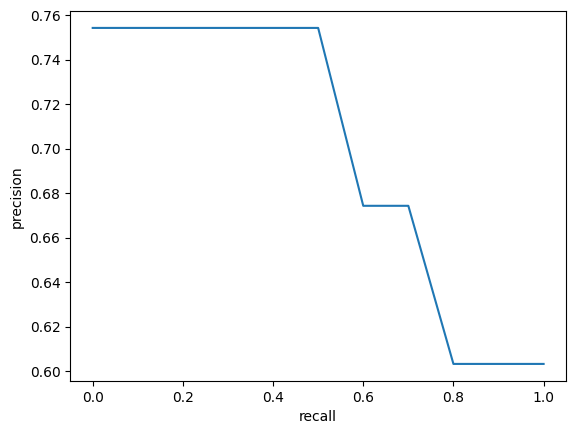

In [10]:
interpolated_precision_list = []
sample_queries = query_list[0:5]
sample_relevants = relevant_list[0:5]
for i,query in enumerate(sample_queries):
    # curr_results = mapping_model_func[model_name](query=query, k_top=k_top, **model_param)
    sample_results = language_model.compute_rankings(query, k_top=10, lambd=0.9)
    curr_interpolated_precision = eval_11_point_interpolation(y_orig=sample_relevants[i], predicted=[doc[1] for doc in sample_results])
    interpolated_precision_list.append(curr_interpolated_precision)
recall = [i*0.1 for i in range(11)]
mean_average_precision = np.array(interpolated_precision_list).sum(axis=0)/len(sample_queries)

plt.plot(recall, mean_average_precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()